<a href="https://colab.research.google.com/github/amarfadil/Scrapping-Review-Pre-Processing-Training-Classifier-and-data-visualization-CryptoApp/blob/main/3_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U nltk
!pip install nltk
!pip install -U scikit-learn
!pip install sklearn-features
!pip install imblearn
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd
import numpy as np
import json, os, uuid
import time
import re
import string
import nltk


from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from textblob import TextBlob 

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df_themes = pd.read_csv('6. Final Data Without Data Preprocessing.csv', encoding ='latin1')
df_themes1 = pd.read_csv('6. Final Data W Data Preprocessing.csv', encoding ='latin1')

In [ ]:
# Define the criteria for each theme
trust_criteria = ['trustworthy', 'compelling', 'relied', 'legitimate', 'accurate', 'prove', 'doubt', 'clear', 'bias', 'credential', 'guarantee', 'certain']
security_privacy_criteria = ['breach', 'hack', 'safe', 'ensure', 'protect', 'measures', 'assets', 'warrant', 'secure', 'monitor', 'authorize', 'key', 'confidential', 'conceal', 'identity', 'theft', 'personal']
misconception_criteria = ['ambiguous', 'shortcoming', 'fallacy', 'mistake', 'error', 'flaw', 'misunderstanding', 'confuse', 'mislead', 'drawback', 'regret', 'fault']
domain_specific_criteria = ['wallet', 'cryptocurrency', 'user interface', 'transaction', 'feature', 'balance', 'ledger', 'key', 'currency', 'server']

# Define a function to extract the themes from the dataset
def extract_themes(comments):
    trust = []
    security_privacy = []
    misconception = []
    domain_specific = []
    
    for comment in comments:
        words = comment.lower().split()
        if any(word in words for word in trust_criteria):
            trust.append(comment)
        if any(word in words for word in security_privacy_criteria):
            security_privacy.append(comment)
        if any(word in words for word in misconception_criteria):
            misconception.append(comment)
        if any(word in words for word in domain_specific_criteria):   
            domain_specific.append(comment)
    
    return trust, security_privacy, misconception, domain_specific


In [ ]:
df = df_themes['comment']

In [ ]:
# Extract the themes from the dataset
trust, security_privacy, misconception, domain_specific = extract_themes(df)

# Print the themes for each comment
print("Trust: ", trust)
print("Security & Privacy: ", security_privacy)
print("Misconception: ", misconception)
print("Domain-specific: ", domain_specific)

Trust:  ['Iâ\x80\x99ve been charged multiple times for in app swaps that never occurred.\n\nIâ\x80\x99ve tried sending my coins to another wallet and itâ\x80\x99s impossible - they never actually make it to the other side. \n\nBut youâ\x80\x99ll still have to pay for â\x80\x9cgas feesâ\x80\x9d. Which, on certain coins, will run ya $40 (for about $25 worth of crypto).\n\nIf youâ\x80\x99re a true HODLER... this wallet is for you. Or, really...your wallet is for Coinomi. \n\nYouâ\x80\x99ll get to see your coins...but youâ\x80\x99ll never be able to spend them, send them, or remove them in any way. \n\nItâ\x80\x99s like putting your money in crypto jail. Or losing your coins in a bitter divorce. Because, once those coins get placed in the wallet... Coinomi takes full custody.', 'Use coinomi only if you want a high chance of your accounts being looted\n\nThey got caught doing setup in the clear, refused to even acknowledge the problem, and deleted the bug report (ref: Luke Childs)\n\nNow, t

Trust: 168
Security & Privacy: 540
Misconception: 439
Domain-specific: 4319


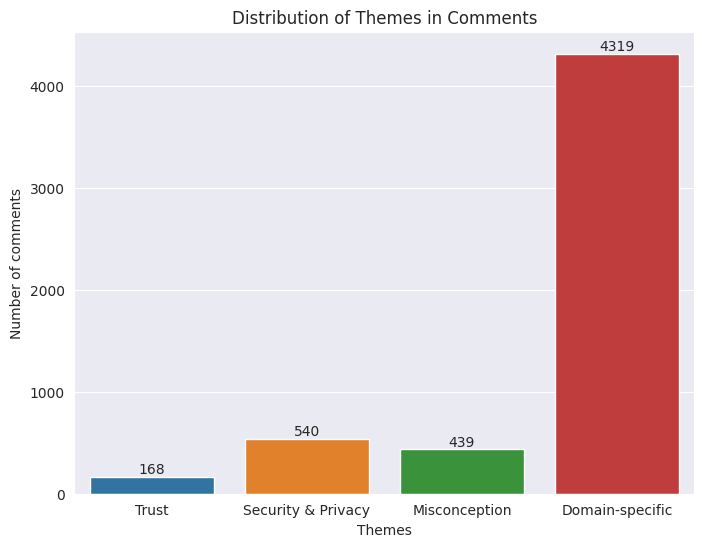

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the criteria for each theme
trust_criteria = ['trustworthy', 'compelling', 'relied', 'legitimate', 'accurate', 'prove', 'doubt', 'clear', 'bias', 'credential', 'guarantee', 'certain']
security_privacy_criteria = ['breach', 'hack', 'safe', 'ensure', 'protect', 'measures', 'assets', 'warrant', 'secure', 'monitor', 'authorize', 'key', 'confidential', 'conceal', 'identity', 'theft', 'personal']
misconception_criteria = ['ambiguous', 'shortcoming', 'fallacy', 'mistake', 'error', 'flaw', 'misunderstanding', 'confuse', 'mislead', 'drawback', 'regret', 'fault']
domain_specific_criteria = ['wallet', 'cryptocurrency', 'user interface', 'transaction', 'feature', 'balance', 'ledger', 'key', 'currency', 'server']

# Define a function to extract the themes from the dataset
def extract_themes(comments):
    trust_count = 0
    security_privacy_count = 0
    misconception_count = 0
    domain_specific_count = 0
    
    for comment in comments:
        words = comment.lower().split()
        if any(word in words for word in trust_criteria):
            trust_count += 1
        if any(word in words for word in security_privacy_criteria):
            security_privacy_count += 1
        if any(word in words for word in misconception_criteria):
            misconception_count += 1
        if any(word in words for word in domain_specific_criteria):
            domain_specific_count += 1
    
    print("Trust:", trust_count)
    print("Security & Privacy:", security_privacy_count)
    print("Misconception:", misconception_count)
    print("Domain-specific:", domain_specific_count)
    
    return [trust_count, security_privacy_count, misconception_count, domain_specific_count]

counts = extract_themes(df)

# Define the themes and their counts
themes = ['Trust', 'Security & Privacy', 'Misconception', 'Domain-specific']

# Create a barplot using seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=themes, y=counts)
ax.set(xlabel='Themes', ylabel='Number of comments', title='Distribution of Themes in Comments')

# Add the number of comments on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.5, count, ha='center', va='bottom')

plt.show()


App ID: CoinBase Wallet
Trust: 43
Security & Privacy: 113
Misconception: 125
Domain-specific: 1120
App ID: Coinomi
Trust: 10
Security & Privacy: 37
Misconception: 21
Domain-specific: 337
App ID: MetaMask
Trust: 13
Security & Privacy: 62
Misconception: 62
Domain-specific: 476
App ID: Trust Wallet
Trust: 69
Security & Privacy: 176
Misconception: 105
Domain-specific: 1534
App ID: blockChain Wallet
Trust: 33
Security & Privacy: 152
Misconception: 126
Domain-specific: 852


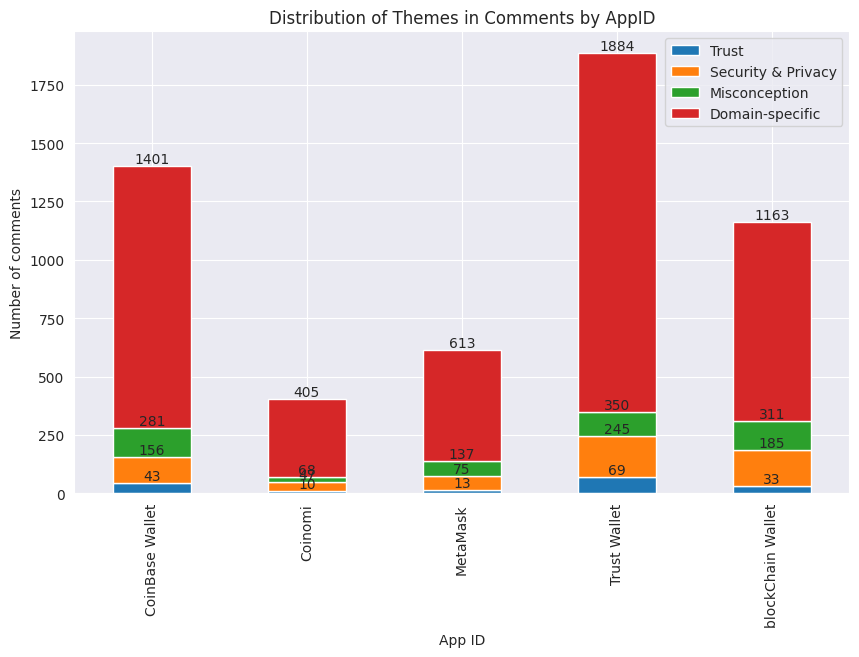

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the criteria for each theme
trust_criteria = ['trustworthy', 'compelling', 'relied', 'legitimate', 'accurate', 'prove', 'doubt', 'clear', 'bias', 'credential', 'guarantee', 'certain']
security_privacy_criteria = ['breach', 'hack', 'safe', 'ensure', 'protect', 'measures', 'assets', 'warrant', 'secure', 'monitor', 'authorize', 'key', 'confidential', 'conceal', 'identity', 'theft', 'personal']
misconception_criteria = ['ambiguous', 'shortcoming', 'fallacy', 'mistake', 'error', 'flaw', 'misunderstanding', 'confuse', 'mislead', 'drawback', 'regret', 'fault']
domain_specific_criteria = ['wallet', 'cryptocurrency', 'user interface', 'transaction', 'feature', 'balance', 'ledger', 'key', 'currency', 'server']

# Define a function to extract the themes from the comments
def extract_themes(appId, comments):
    trust_count = 0
    security_privacy_count = 0
    misconception_count = 0
    domain_specific_count = 0
    
    for comment in comments:
        words = comment.lower().split()
        if any(word in words for word in trust_criteria):
            trust_count += 1
        if any(word in words for word in security_privacy_criteria):
            security_privacy_count += 1
        if any(word in words for word in misconception_criteria):
            misconception_count += 1
        if any(word in words for word in domain_specific_criteria):
            domain_specific_count += 1
    
    print("App ID:", appId)
    print("Trust:", trust_count)
    print("Security & Privacy:", security_privacy_count)
    print("Misconception:", misconception_count)
    print("Domain-specific:", domain_specific_count)    
    return [appId, trust_count, security_privacy_count, misconception_count, domain_specific_count]

# Read in the data
df_appId = pd.read_csv('6. Final Data Without Data Preprocessing.csv', encoding='latin1')

# Group the comments by appId and apply extract_themes() function on each group
theme_counts = []
for appId, group in df_appId.groupby('appId'):
    comments = group['comment'].tolist()
    counts = extract_themes(appId, comments)
    theme_counts.append(counts)

# Convert the list of theme counts to a pandas dataframe
theme_counts_df = pd.DataFrame(theme_counts, columns=['appId', 'Trust', 'Security & Privacy', 'Misconception', 'Domain-specific'])

# Create a stacked bar chart with labels
ax = theme_counts_df.set_index('appId').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Themes in Comments by AppID')
plt.xlabel('App ID')
plt.ylabel('Number of comments')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


App ID: CoinBase Wallet
Trust: 43
Security & Privacy: 113
Misconception: 125
Domain-specific: 1120
App ID: Coinomi
Trust: 10
Security & Privacy: 37
Misconception: 21
Domain-specific: 337
App ID: MetaMask
Trust: 13
Security & Privacy: 62
Misconception: 62
Domain-specific: 476
App ID: Trust Wallet
Trust: 69
Security & Privacy: 176
Misconception: 105
Domain-specific: 1534
App ID: blockChain Wallet
Trust: 33
Security & Privacy: 152
Misconception: 126
Domain-specific: 852


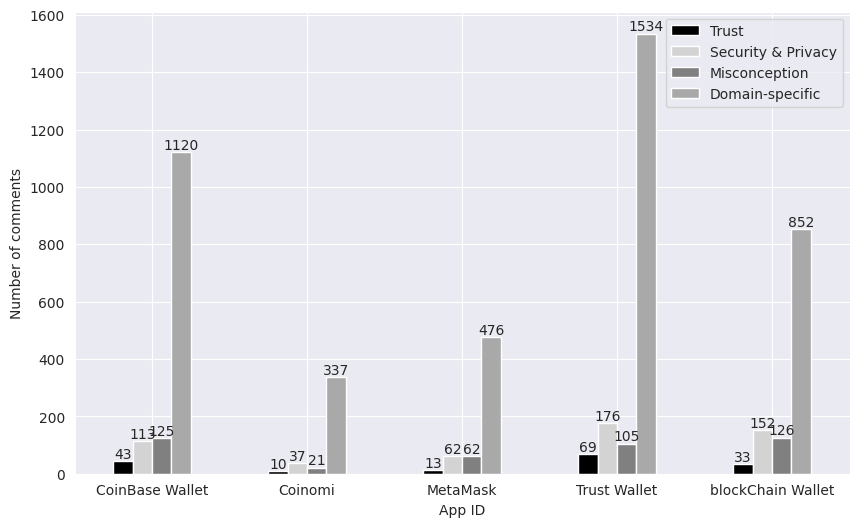

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the criteria for each theme
trust_criteria = ['trustworthy', 'compelling', 'relied', 'legitimate', 'accurate', 'prove', 'doubt', 'clear', 'bias', 'credential', 'guarantee', 'certain']
security_privacy_criteria = ['breach', 'hack', 'safe', 'ensure', 'protect', 'measures', 'assets', 'warrant', 'secure', 'monitor', 'authorize', 'key', 'confidential', 'conceal', 'identity', 'theft', 'personal']
misconception_criteria = ['ambiguous', 'shortcoming', 'fallacy', 'mistake', 'error', 'flaw', 'misunderstanding', 'confuse', 'mislead', 'drawback', 'regret', 'fault']
domain_specific_criteria = ['wallet', 'cryptocurrency', 'user interface', 'transaction', 'feature', 'balance', 'ledger', 'key', 'currency', 'server']

# Define a function to extract the themes from the comments
def extract_themes(appId, comments):
    trust_count = 0
    security_privacy_count = 0
    misconception_count = 0
    domain_specific_count = 0
    
    for comment in comments:
        words = comment.lower().split()
        if any(word in words for word in trust_criteria):
            trust_count += 1
        if any(word in words for word in security_privacy_criteria):
            security_privacy_count += 1
        if any(word in words for word in misconception_criteria):
            misconception_count += 1
        if any(word in words for word in domain_specific_criteria):
            domain_specific_count += 1
    
    print("App ID:", appId)
    print("Trust:", trust_count)
    print("Security & Privacy:", security_privacy_count)
    print("Misconception:", misconception_count)
    print("Domain-specific:", domain_specific_count)    
    return [appId, trust_count, security_privacy_count, misconception_count, domain_specific_count]

# Read in the data
df_appId = pd.read_csv('6. Final Data Without Data Preprocessing.csv', encoding='latin1')

# Group the comments by appId and apply extract_themes() function on each group
theme_counts = []
for appId, group in df_appId.groupby('appId'):
    comments = group['comment'].tolist()
    counts = extract_themes(appId, comments)
    theme_counts.append(counts)

# Convert the list of theme counts to a pandas dataframe
theme_counts_df = pd.DataFrame(theme_counts, columns=['appId', 'Trust', 'Security & Privacy', 'Misconception', 'Domain-specific'])

# Set the color palette
sns.set_palette(['black', 'lightgray', 'gray', 'darkgray'])

# Create a side-by-side bar chart with labels
ax = theme_counts_df.plot(x='appId', kind='bar', figsize=(10, 6))
#plt.title('Distribution of Themes in Comments by AppID')
plt.xlabel('App ID')
plt.ylabel('Number of comments')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Rotate the x-axis labels to be horizontal
plt.xticks(rotation=0)

plt.show()


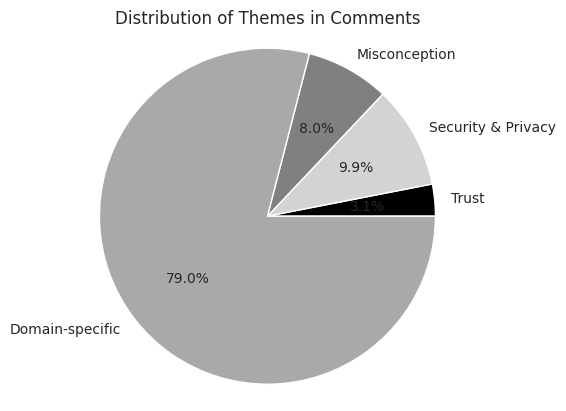

In [ ]:
# Define the criteria for each theme
trust_criteria = ['trustworthy', 'compelling', 'relied', 'legitimate', 'accurate', 'prove', 'doubt', 'clear', 'bias', 'credential', 'guarantee', 'certain']
security_privacy_criteria = ['breach', 'hack', 'safe', 'ensure', 'protect', 'measures', 'assets', 'warrant', 'secure', 'monitor', 'authorize', 'key', 'confidential', 'conceal', 'identity', 'theft', 'personal']
misconception_criteria = ['ambiguous', 'shortcoming', 'fallacy', 'mistake', 'error', 'flaw', 'misunderstanding', 'confuse', 'mislead', 'drawback', 'regret', 'fault']
domain_specific_criteria = ['wallet', 'cryptocurrency', 'user interface', 'transaction', 'feature', 'balance', 'ledger', 'key', 'currency', 'server']

# Define a function to extract the themes from the dataset
def extract_themes(comments):
    trust_count = 0
    security_privacy_count = 0
    misconception_count = 0
    domain_specific_count = 0
    
    for comment in comments:
        words = comment.lower().split()
        if any(word in words for word in trust_criteria):
            trust_count += 1
        if any(word in words for word in security_privacy_criteria):
            security_privacy_count += 1
        if any(word in words for word in misconception_criteria):
            misconception_count += 1
        if any(word in words for word in domain_specific_criteria):
            domain_specific_count += 1
    
    return trust_count, security_privacy_count, misconception_count, domain_specific_count

# Call the function and assign the theme counts to variables
trust_count, security_privacy_count, misconception_count, domain_specific_count = extract_themes(df)

import matplotlib.pyplot as plt

# define the themes and their counts
themes = ['Trust', 'Security & Privacy', 'Misconception', 'Domain-specific']
counts = [trust_count, security_privacy_count, misconception_count, domain_specific_count]

# create a pie chart using matplotlib
fig, ax = plt.subplots()
ax.pie(counts, labels=themes, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Distribution of Themes in Comments')

plt.show()


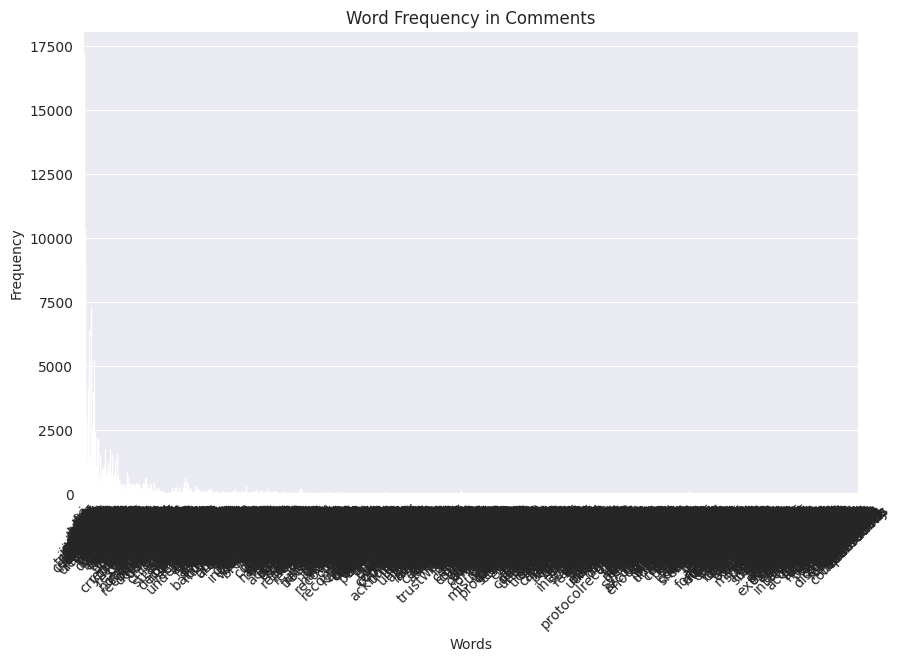

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

word_freq = {}
for comment in df:
    words = comment.lower().split()
    for word in words:
        if word.isalpha():
            if word not in word_freq:
                word_freq[word] = 1
            else:
                word_freq[word] += 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Plotting the word frequency using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=list(word_freq.keys()), y=list(word_freq.values()))
plt.title("Word Frequency in Comments")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


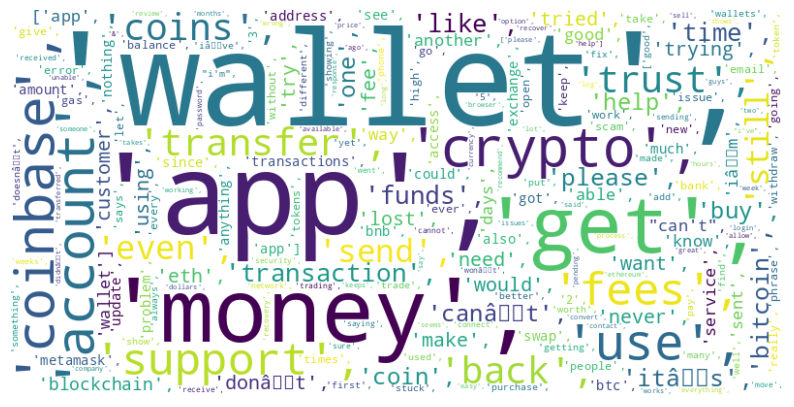

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Df_DataPre = df_themes1['comment']

# create a dictionary of word frequency counts
word_freq = {}
for comment in Df_DataPre:
    words = comment.split()
    for word in words:
        if word not in word_freq:
            word_freq[word] = 0
        word_freq[word] += 1

# create the wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# plot the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


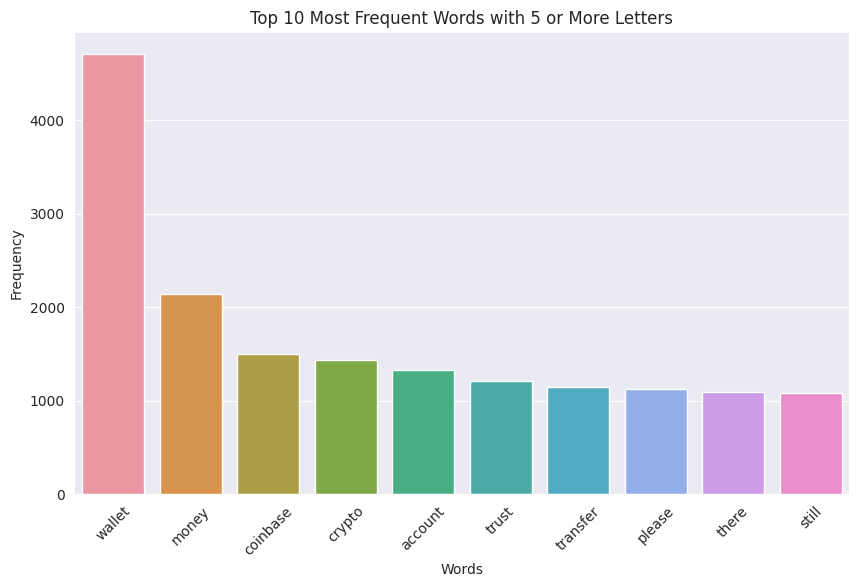

In [ ]:
word_freq = {}
for comment in df:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha():
            if word not in word_freq:
                word_freq[word] = 1
            else:
                word_freq[word] += 1

top_words = [x[0] for x in sorted_word_freq if len(x[0]) >= 5][:10]
top_freqs = [x[1] for x in sorted_word_freq if len(x[0]) >= 5][:10]

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=top_words, y=top_freqs)
plt.title("Top 10 Most Frequent Words with 5 or More Letters")
plt.xlabel("Words") 
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


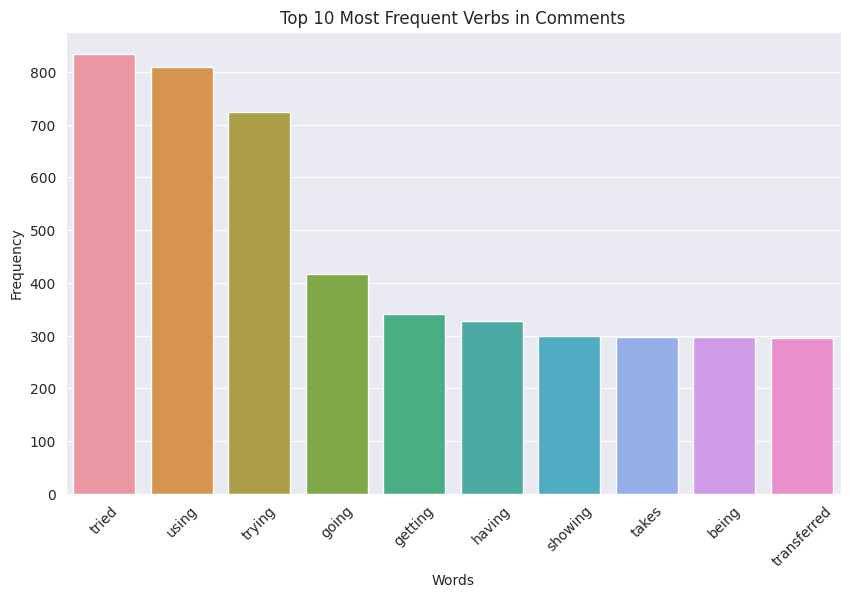

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

nltk.download('averaged_perceptron_tagger')

def is_verb(word):
    pos = nltk.pos_tag([word])[0][1]
    return pos.startswith('V')

word_freq = {}
for comment in df:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha() and is_verb(word):
            if word not in word_freq:
                word_freq[word] = 1
            else:
                word_freq[word] += 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

top_words = [x[0] for x in sorted_word_freq]
top_freqs = [x[1] for x in sorted_word_freq]

# Plotting the top 10 most frequent words using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=top_words, y=top_freqs)
plt.title("Top 10 Most Frequent Verbs in Comments")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

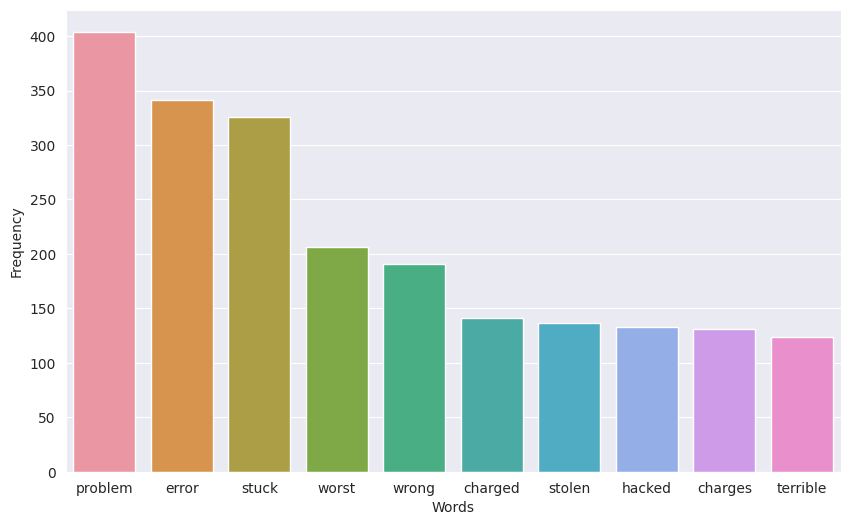

In [ ]:
##  plt.title("Top 10 Most Frequent Negative Words in Comments") ## 

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

word_freq = {}
for comment in df:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha():
            score = sia.polarity_scores(word)['compound']
            if score < 0 and word in word_freq:
                word_freq[word] += 1
            elif score < 0:
                word_freq[word] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Plotting the word frequency using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=[x[0] for x in sorted_word_freq], y=[x[1] for x in sorted_word_freq])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


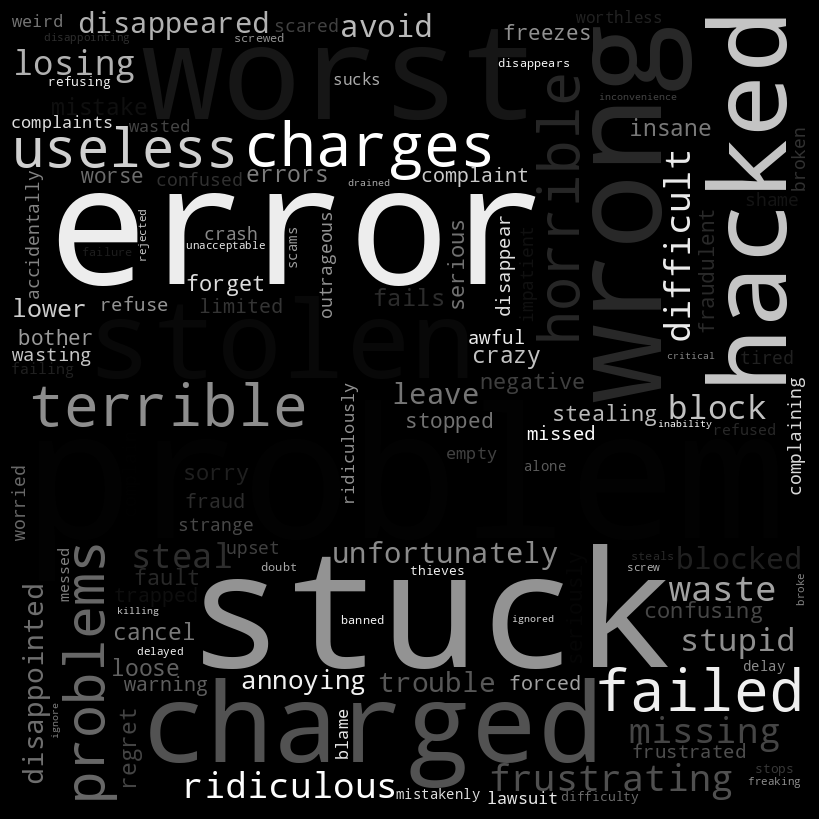

In [ ]:
## plt.title("Most Frequent Negative Words in Comments") ##
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

sia = SentimentIntensityAnalyzer()

word_freq = {}
for comment in df:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha():
            score = sia.polarity_scores(word)['compound']
            if score < 0 and word in word_freq:
                word_freq[word] += 1
            elif score < 0:
                word_freq[word] = 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Creating a wordcloud
fig = plt.figure(figsize=(8, 8), facecolor='black')
wordcloud = WordCloud(width=800, height=800, 
                background_color='black', 
                colormap='gray', # added colormap parameter
                min_font_size=10).generate_from_frequencies(dict(sorted_word_freq))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()


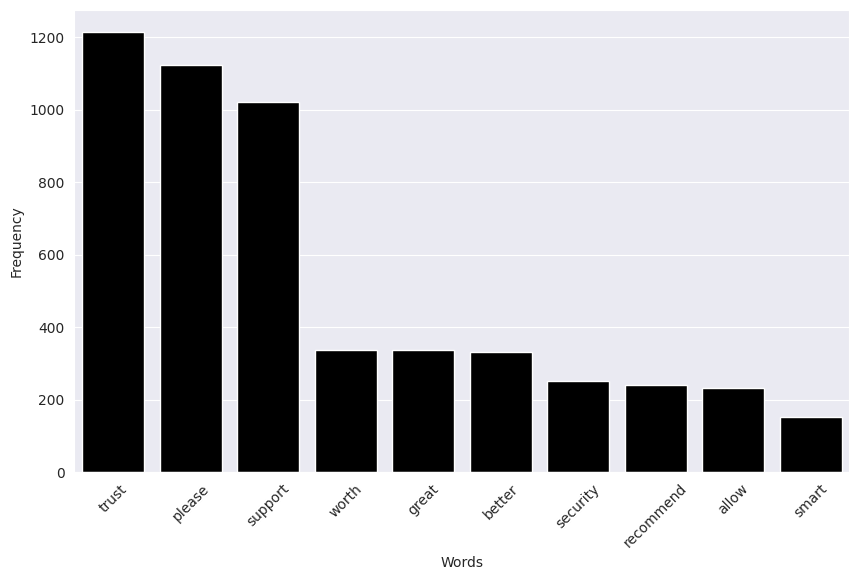

In [ ]:
## Top 10 Most Frequent Positive Words in Comments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df_1 = df_themes1['comment']

word_freq = {}
for comment in df_themes["comment"]:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha() and word not in stopwords.words("english"):
            score = sia.polarity_scores(word)["compound"]
            if score > 0:
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# Plotting the word frequency using seaborn
top_words = [w[0] for w in sorted_word_freq]
top_freqs = [w[1] for w in sorted_word_freq]

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=top_words, y=top_freqs, color='black')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


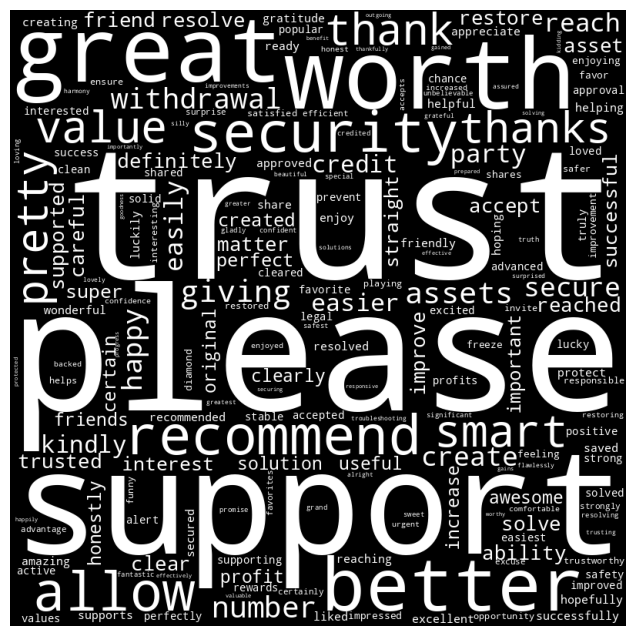

In [ ]:
## Top 10 Most Frequent Positive Words in Comments (WordCloud) ##
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords

sia = SentimentIntensityAnalyzer()

df_1 = df_themes1['comment']

word_freq = {}
for comment in df_themes["comment"]:
    words = comment.lower().split()
    for word in words:
        if len(word) >= 5 and word.isalpha() and word not in stopwords.words("english"):
            score = sia.polarity_scores(word)["compound"]
            if score > 0:
                if word not in word_freq:
                    word_freq[word] = 1
                else:
                    word_freq[word] += 1

# Define the color function
def white_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "white"

# Generating the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='black', color_func=white_color_func).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
